In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [75]:
x,y = make_blobs(n_samples=1000,centers=4,n_features=3,random_state=23)

In [76]:
x.shape

(1000, 3)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


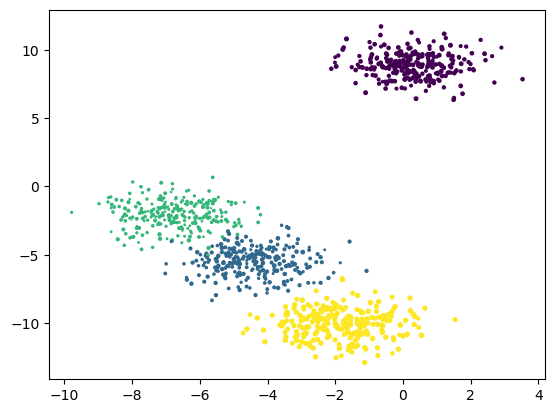

In [77]:
plt.scatter(x[:,0],x[:,1],x[:,2],c = y)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 43)

In [79]:
from sklearn.cluster import KMeans

In [80]:
# Manul Process(Elbow Method) to select the k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

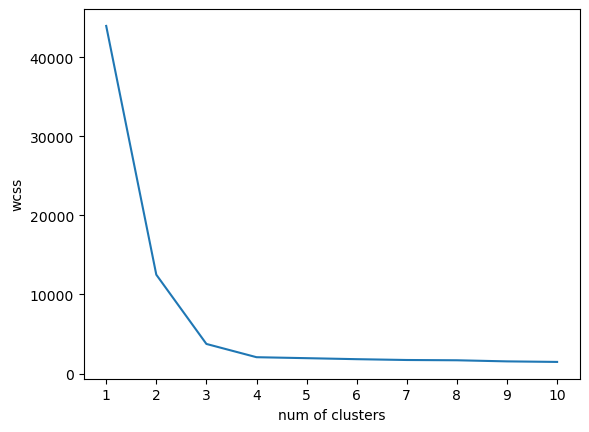

In [81]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("num of clusters")
plt.ylabel("wcss")
plt.show()

In [82]:
kmeans = KMeans(n_clusters=4,init="k-means++")

In [83]:
y_label = kmeans.fit_predict(x_train)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


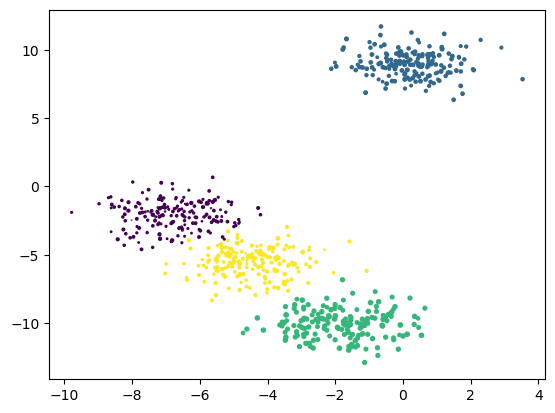

In [84]:
plt.scatter(x_train[:,0],x_train[:,1],x_train[:,2],c = y_label)

In [85]:
y_test_label = kmeans.predict(x_test)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


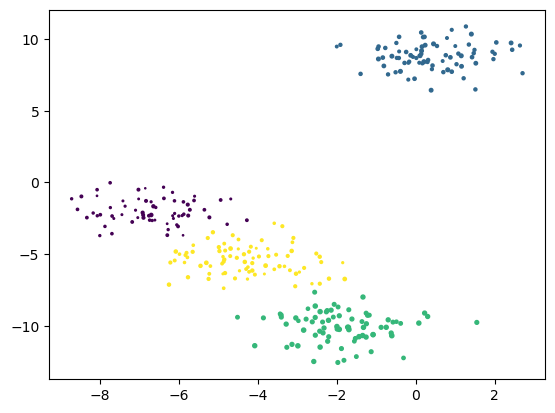

In [86]:
plt.scatter(x_test[:,0],x_test[:,1],x_test[:,2],c = y_test_label)

In [87]:
# For automate the finding k value we use knee locator labrery
# ! pip install kneed

In [88]:
from kneed import KneeLocator

In [89]:
kl = KneeLocator(range(1,11),wcss,curve = "convex",direction="decreasing")
kl.elbow

3

In [90]:
# Performance metrics
# silhoutte score
from sklearn.metrics import silhouette_score

In [91]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [92]:
silhouette_coefficients

[0.691452326343255,
 0.6806834890376738,
 0.6272478012606567,
 0.5334874806414621,
 0.37429158244963284,
 0.3700392802990606,
 0.22806923081107183,
 0.38477683932263046,
 0.22227522890952242]

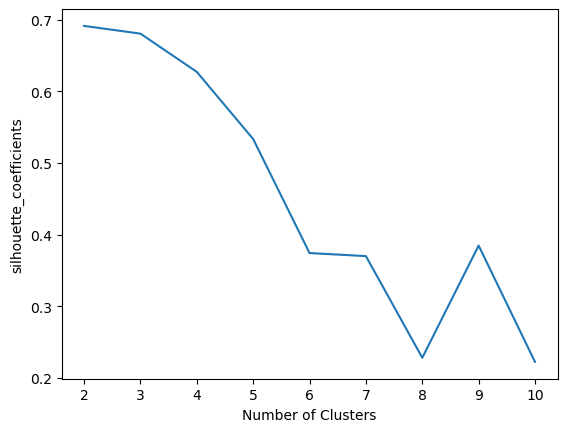

In [93]:
# Plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [94]:
# Performance metrics
# silhoutte score
from sklearn.metrics import silhouette_score
score = silhouette_score(x_train,y_label)
score

0.6272478012606567